In [13]:
# Import the Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np

In [14]:
# Import the dataset
s_d=pd.read_excel("E:\Personal\Analytics\Assignment\Biswajit\Bigazon.xlsx")

In [15]:
s_d.head()
s_d.describe()

,Channel,Region,Fresh Fruits,Milk,Grocery,Frozen Foods,Detergents/Washing Power,Delicatessen
0,Online,Andhra Pradesh,12669,9656,7561,214,2674,1338
1,Online,Andhra Pradesh,7057,9810,9568,1762,3293,1776
2,Online,Andhra Pradesh,6353,8808,7684,2405,3516,7844
3,Store,Andhra Pradesh,13265,1196,4221,6404,507,1788
4,Online,Andhra Pradesh,22615,5410,7198,3915,1777,5185


,Fresh Fruits,Milk,Grocery,Frozen Foods,Detergents/Washing Power,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [17]:
# Count of each variable checking 
s_d['Channel'].value_counts()
s_d['Region'].value_counts()

Store     298
Online    142
Name: Channel, dtype: int64

Andhra Pradesh    316
Kerala             77
Karnataka          47
Name: Region, dtype: int64

In [19]:
# Null Value checking
pd.isnull(s_d).any()

Channel                     False
Region                      False
Fresh Fruits                False
Milk                        False
Grocery                     False
Frozen Foods                False
Detergents/Washing Power    False
Delicatessen                False
dtype: bool

In [20]:
s_d_grouped = s_d.groupby('Region')

In [21]:
# Sales calculations by region for each category
fresh_fruits_regionwise_sum= s_d_grouped['Fresh Fruits'].agg(np.sum)
print (fresh_fruits_regionwise_sum)

Region
Andhra Pradesh    3960577
Karnataka          464721
Kerala             854833
Name: Fresh Fruits, dtype: int64


In [23]:
type (fresh_fruits_regionwise_sum)

pandas.core.series.Series

In [25]:
milk_regionwise_sum= s_d_grouped['Milk'].agg(np.sum)
print (milk_regionwise_sum)
type(milk_regionwise_sum)

Region
Andhra Pradesh    1888759
Karnataka          239144
Kerala             422454
Name: Milk, dtype: int64


pandas.core.series.Series

In [26]:
grocery_regionwise_sum=s_d_grouped['Grocery'].agg(np.sum)
print (grocery_regionwise_sum)
type(grocery_regionwise_sum)

Region
Andhra Pradesh    2495251
Karnataka          433274
Kerala             570037
Name: Grocery, dtype: int64


pandas.core.series.Series

In [27]:
frozen_foods_regionwise_sum= s_d_grouped['Frozen Foods'].agg(np.sum)
print(frozen_foods_regionwise_sum)

Region
Andhra Pradesh    930492
Karnataka         190132
Kerala            231026
Name: Frozen Foods, dtype: int64


In [28]:
Detergents_Washing_Powder_regionwise_sum = s_d_grouped['Detergents/Washing Power'].agg(np.sum)
print (Detergents_Washing_Powder_regionwise_sum)

Region
Andhra Pradesh    890410
Karnataka         173311
Kerala            204136
Name: Detergents/Washing Power, dtype: int64


In [29]:
Delicatessen_regionwise_sum = s_d_grouped['Delicatessen'].agg(np.sum)
print (Delicatessen_regionwise_sum)

Region
Andhra Pradesh    512110
Karnataka          54506
Kerala            104327
Name: Delicatessen, dtype: int64


In [35]:
#convert to dataframes from series
fresh_fruits_regionwise_sum_df = fresh_fruits_regionwise_sum.to_frame().reset_index()
milk_regionwise_sum_df = milk_regionwise_sum.to_frame().reset_index()
grocery_regionwise_sum_df = grocery_regionwise_sum.to_frame().reset_index()
frozen_foods_regionwise_sum_df = frozen_foods_regionwise_sum.to_frame().reset_index()
Detergents_Washing_Powder_regionwise_sum_df = Detergents_Washing_Powder_regionwise_sum.to_frame().reset_index()
Delicatessen_regionwise_sum_df = Delicatessen_regionwise_sum.to_frame().reset_index()

In [36]:
#merge the dataframes one-by-one
df1 = pd.merge(fresh_fruits_regionwise_sum_df, milk_regionwise_sum_df, on = 'Region')
df1

,Region,Fresh Fruits,Milk
0,Andhra Pradesh,3960577,1888759
1,Karnataka,464721,239144
2,Kerala,854833,422454


In [37]:
df2 = pd.merge(df1, grocery_regionwise_sum_df, on = 'Region' )
df2

,Region,Fresh Fruits,Milk,Grocery
0,Andhra Pradesh,3960577,1888759,2495251
1,Karnataka,464721,239144,433274
2,Kerala,854833,422454,570037


In [38]:
df3 = pd.merge(df2, frozen_foods_regionwise_sum_df, on = 'Region' )
df3

,Region,Fresh Fruits,Milk,Grocery,Frozen Foods
0,Andhra Pradesh,3960577,1888759,2495251,930492
1,Karnataka,464721,239144,433274,190132
2,Kerala,854833,422454,570037,231026


In [39]:
df4 = pd.merge(df3, Detergents_Washing_Powder_regionwise_sum_df, on = 'Region' )
df4

,Region,Fresh Fruits,Milk,Grocery,Frozen Foods,Detergents/Washing Power
0,Andhra Pradesh,3960577,1888759,2495251,930492,890410
1,Karnataka,464721,239144,433274,190132,173311
2,Kerala,854833,422454,570037,231026,204136


In [40]:
df5 = pd.merge(df4, Delicatessen_regionwise_sum_df, on = 'Region' )
df5

,Region,Fresh Fruits,Milk,Grocery,Frozen Foods,Detergents/Washing Power,Delicatessen
0,Andhra Pradesh,3960577,1888759,2495251,930492,890410,512110
1,Karnataka,464721,239144,433274,190132,173311,54506
2,Kerala,854833,422454,570037,231026,204136,104327


In [41]:
#add total_sales column in the final dataframe
df5['total_sales'] = df5.sum(axis=1)
df5

,Region,Fresh Fruits,Milk,Grocery,Frozen Foods,Detergents/Washing Power,Delicatessen,total_sales
0,Andhra Pradesh,3960577,1888759,2495251,930492,890410,512110,10677599
1,Karnataka,464721,239144,433274,190132,173311,54506,1555088
2,Kerala,854833,422454,570037,231026,204136,104327,2386813


In [42]:
#draw pie chart
region = df5['Region']
region

0    Andhra Pradesh
1         Karnataka
2            Kerala
Name: Region, dtype: object

In [43]:
type(region)

pandas.core.series.Series

In [44]:
total_sales=df5['total_sales']

In [45]:
# Convert to list
region_list=region.tolist()

In [48]:
type(region_list)
total_sales_list=total_sales.tolist()
type (total_sales_list)

list

list

([<matplotlib.patches.Wedge at 0x167b7603a90>,
 [Text(-0.824283,-0.728394,'Andhra Pradesh'),
  Text(1.07565,0.230183,'Karnataka'),
  Text(0.53978,0.958456,'Kerala')],
 [Text(-0.449609,-0.397306,'73.0%'),
  Text(0.586716,0.125554,'10.6%'),
  Text(0.294426,0.522794,'16.3%')])

Text(0.5,1,'Regionwise Total Sales Percentage')

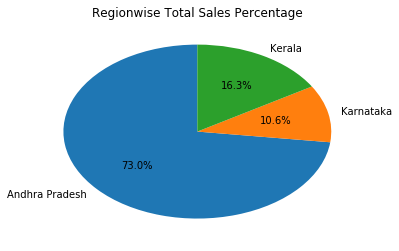

In [49]:
#plt.pie(total_sales_list, labels = region_list, startangle= = 90, autopct = '%.1f%%')
plt.pie(total_sales_list, labels=region_list, startangle=90, autopct='%.1f%%')
plt.title('Regionwise Total Sales Percentage')
plt.show()

In [50]:
df5

,Region,Fresh Fruits,Milk,Grocery,Frozen Foods,Detergents/Washing Power,Delicatessen,total_sales
0,Andhra Pradesh,3960577,1888759,2495251,930492,890410,512110,10677599
1,Karnataka,464721,239144,433274,190132,173311,54506,1555088
2,Kerala,854833,422454,570037,231026,204136,104327,2386813


In [51]:
#find total sales across categories
fresh_fruits_sales = df5['Fresh Fruits'].sum()
fresh_fruits_sales

5280131

In [52]:
milk_sales = df5['Milk'].sum()
milk_sales

2550357

In [53]:
grocery_sales = df5['Grocery'].sum()
grocery_sales

3498562

In [54]:
frozen_foods_sales = df5['Frozen Foods'].sum()
frozen_foods_sales

1351650

In [55]:
det_washing_sales = df5['Detergents/Washing Power'].sum()
det_washing_sales

1267857

In [56]:
delicatessen_sales = df5['Delicatessen'].sum()
delicatessen_sales

670943

In [57]:
#create a dataframe for the sales
items = ['Fresh Fruits', 'Milk', 'Grocery', 'Frozen Foods','Detergents/Washing Power','Delicatessen']
total_sales = [fresh_fruits_sales, milk_sales, grocery_sales, frozen_foods_sales,det_washing_sales, delicatessen_sales]
dict1 = {'Categories': items, 'Sales': total_sales}
#dict1 = {'Fresh Fruits': fresh_fruits_sales, 'Milk': milk_sales, 'Grocery': grocery_sales, 'Frozen Foods': frozen_foods_sales, 'Delicatessen': delicatessen_sales}
dict1

{'Categories': ['Fresh Fruits',
  'Milk',
  'Grocery',
  'Frozen Foods',
  'Detergents/Washing Power',
  'Delicatessen'],
 'Sales': [5280131, 2550357, 3498562, 1351650, 1267857, 670943]}

In [58]:
df6 = pd.DataFrame.from_dict(dict1)
df6

,Categories,Sales
0,Fresh Fruits,5280131
1,Milk,2550357
2,Grocery,3498562
3,Frozen Foods,1351650
4,Detergents/Washing Power,1267857
5,Delicatessen,670943


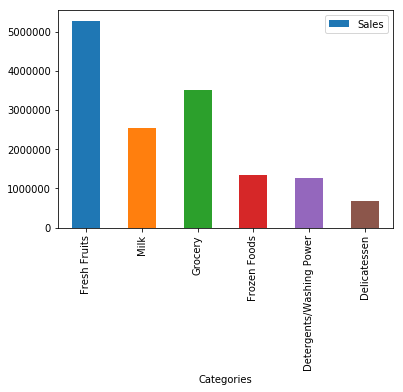

In [59]:
df6.plot.bar(x='Categories', y='Sales')
plt.show()

In [60]:
df7 = df6.sort_values(by = ['Sales'], ascending = False)
df7

,Categories,Sales
0,Fresh Fruits,5280131
2,Grocery,3498562
1,Milk,2550357
3,Frozen Foods,1351650
4,Detergents/Washing Power,1267857
5,Delicatessen,670943


Text(0.5,0,'Categories')

Text(0,0.5,'Total Sales in Rs')

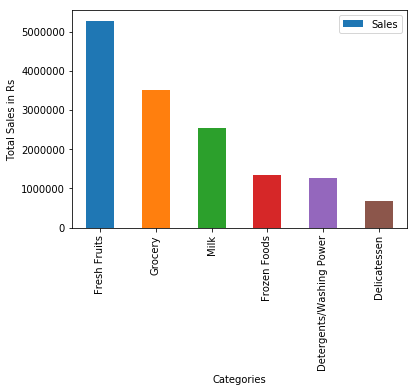

In [61]:
df7.plot.bar(x='Categories', y='Sales')
plt.xlabel('Categories')
plt.ylabel('Total Sales in Rs')
plt.show()

In [63]:
#df6[['Categories', 'Sales']].sort_values(by='Sales', ascending = False).plot(kind = 'bar')
#plt.show()

In [65]:
s_d.head()

,Channel,Region,Fresh Fruits,Milk,Grocery,Frozen Foods,Detergents/Washing Power,Delicatessen
0,Online,Andhra Pradesh,12669,9656,7561,214,2674,1338
1,Online,Andhra Pradesh,7057,9810,9568,1762,3293,1776
2,Online,Andhra Pradesh,6353,8808,7684,2405,3516,7844
3,Store,Andhra Pradesh,13265,1196,4221,6404,507,1788
4,Online,Andhra Pradesh,22615,5410,7198,3915,1777,5185


In [66]:
#https://stackoverflow.com/questions/44309507/stacked-bar-plot-using-matplotlib

In [67]:
#fresh_fruits_sales = df5['Fresh Fruits'].sum()

In [68]:
#Represent sales data splitted between online/store across categories

In [69]:
df_online = s_d.loc[s_d['Channel'] == 'Online']
df_online.head()

,Channel,Region,Fresh Fruits,Milk,Grocery,Frozen Foods,Detergents/Washing Power,Delicatessen
0,Online,Andhra Pradesh,12669,9656,7561,214,2674,1338
1,Online,Andhra Pradesh,7057,9810,9568,1762,3293,1776
2,Online,Andhra Pradesh,6353,8808,7684,2405,3516,7844
4,Online,Andhra Pradesh,22615,5410,7198,3915,1777,5185
5,Online,Andhra Pradesh,9413,8259,5126,666,1795,1451


In [70]:
df_store = s_d.loc[s_d['Channel'] == 'Store']
df_store.head()

,Channel,Region,Fresh Fruits,Milk,Grocery,Frozen Foods,Detergents/Washing Power,Delicatessen
3,Store,Andhra Pradesh,13265,1196,4221,6404,507,1788
8,Store,Andhra Pradesh,5963,3648,6192,425,1716,750
15,Store,Andhra Pradesh,10253,1114,3821,397,964,412
17,Store,Andhra Pradesh,5876,6157,2933,839,370,4478
19,Store,Andhra Pradesh,7780,2495,9464,669,2518,501


In [71]:
fresh_fruits_sales_online = df_online['Fresh Fruits'].sum()
fresh_fruits_sales_online

1264414

In [72]:
fresh_fruits_sales_store = df_store['Fresh Fruits'].sum()
fresh_fruits_sales_store

4015717

In [73]:
fresh_fruits_total_sales = fresh_fruits_sales_online + fresh_fruits_sales_store
fresh_fruits_total_sales

5280131

In [74]:
milk_sales_online = df_online['Milk'].sum()
milk_sales_online

1521743

In [75]:
milk_sales_store = df_store['Milk'].sum()
milk_sales_store

1028614

In [76]:
milk_sales_total = milk_sales_online + milk_sales_store
milk_sales_total

2550357

In [77]:
grocery_sales_online = df_online['Grocery'].sum()
grocery_sales_online

2317845

In [78]:
grocery_sales_store = df_store['Grocery'].sum()
grocery_sales_store

1180717

In [79]:
grocery_sales_total = grocery_sales_store + grocery_sales_online
grocery_sales_total

3498562

In [80]:
frozen_foods_sales_online = df_online['Frozen Foods'].sum()
frozen_foods_sales_online

234671

In [81]:
frozen_foods_sales_store = df_store['Frozen Foods'].sum()
frozen_foods_sales_store

1116979

In [82]:
frozen_foods_sales_total = frozen_foods_sales_store + frozen_foods_sales_online
frozen_foods_sales_total

1351650

In [83]:
det_washing_sales_online = df_online['Detergents/Washing Power'].sum()
det_washing_sales_online

1032270

In [84]:
det_washing_sales_store = df_store['Detergents/Washing Power'].sum()
det_washing_sales_store

235587

In [85]:
det_washing_sales_total = det_washing_sales_online + det_washing_sales_store
det_washing_sales_total

1267857

In [86]:
delicatessen_sales_online = df_online['Delicatessen'].sum()
delicatessen_sales_online

248988

In [87]:
delicatessen_sales_store = df_store['Delicatessen'].sum()
delicatessen_sales_store

421955

In [88]:
delicatessen_sales_total = delicatessen_sales_store + delicatessen_sales_online
delicatessen_sales_total

670943

In [104]:
#Do customer segmentation
s_d.describe()

,Fresh Fruits,Milk,Grocery,Frozen Foods,Detergents/Washing Power,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [105]:
#plt.figure(figsize=(15,10))
#sns.distplot(s_d.Milk)
#plt.show()

In [106]:
s_d['total_sales'] = s_d.sum(axis = 1)

In [107]:
s_d.head()

,Channel,Region,Fresh Fruits,Milk,Grocery,Frozen Foods,Detergents/Washing Power,Delicatessen,total_sales
0,Online,Andhra Pradesh,12669,9656,7561,214,2674,1338,34112
1,Online,Andhra Pradesh,7057,9810,9568,1762,3293,1776,33266
2,Online,Andhra Pradesh,6353,8808,7684,2405,3516,7844,36610
3,Store,Andhra Pradesh,13265,1196,4221,6404,507,1788,27381
4,Online,Andhra Pradesh,22615,5410,7198,3915,1777,5185,46100


In [108]:
s_d.describe()

,Fresh Fruits,Milk,Grocery,Frozen Foods,Detergents/Washing Power,Delicatessen,total_sales
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000


In [109]:
#plt.figure(figsize=(15,10))
#sns.distplot(s_d.total_sales)
#plt.show()

In [110]:
# s_d1 = s_d['total_sales']
#s_d1.head()

In [111]:
#s_d2 = s_d.sort_values('total_sales', ascending = False)

In [112]:
#plt.figure(figsize=(15,10))
#sns.distplot(s_d2.total_sales)
#plt.show()

In [113]:
#sorted_s_d = s_d.sort_values('total_sales', ascending = False)

In [114]:
#sorted_s_d.head(10)

In [115]:
#sorted_s_d.tail(10)

In [116]:
#sorted_s_d.hist(column = 'total_sales')
#plt.show();

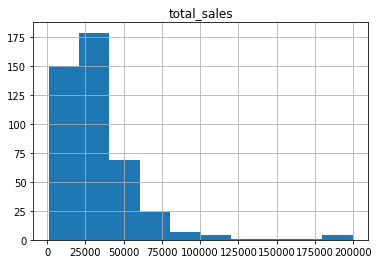

In [117]:
s_d.hist(column = 'total_sales')
plt.show();

In [118]:
low_total_sales = s_d[s_d['total_sales']<=25000]

In [119]:
low_total_sales.describe()

,Fresh Fruits,Milk,Grocery,Frozen Foods,Detergents/Washing Power,Delicatessen,total_sales
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,6145.784211,2448.321053,3176.552632,2172.831579,811.184211,785.910526,15540.584211
std,4383.850270,1979.583668,2300.660534,2429.706657,1163.564717,743.482580,5580.713982
min,3.000000,55.000000,137.000000,47.000000,3.000000,3.000000,904.000000
25%,2469.750000,1012.500000,1563.000000,606.000000,174.500000,304.750000,11349.500000
50%,5900.000000,1897.000000,2442.000000,1310.000000,333.500000,589.500000,16292.000000
75%,9376.500000,3292.750000,4286.000000,2675.500000,847.750000,1059.750000,19651.750000
max,17327.000000,10678.000000,12400.000000,15601.000000,7271.000000,4829.000000,24968.000000


In [120]:
medium_total_sales = s_d[(s_d['total_sales']>25000) & (s_d['total_sales']<=75000)]

In [121]:
medium_total_sales.describe()

,Fresh Fruits,Milk,Grocery,Frozen Foods,Detergents/Washing Power,Delicatessen,total_sales
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,15059.086957,6830.530435,9712.678261,3212.673913,3574.626087,1683.030435,40072.626087
std,12224.402792,5069.524600,7118.013667,4122.862058,3669.211414,1620.938192,12412.787394
min,18.000000,134.000000,3.000000,25.000000,3.000000,3.000000,25049.000000
25%,4641.750000,3071.250000,3792.500000,824.000000,501.750000,657.750000,29850.500000
50%,12946.500000,6140.000000,8568.000000,1755.500000,2383.500000,1351.500000,35644.000000
75%,21417.000000,9521.250000,13670.750000,3934.500000,5955.750000,2229.500000,47512.000000
max,56159.000000,25862.000000,36486.000000,35009.000000,17120.000000,14472.000000,73302.000000


In [122]:
high_total_sales = s_d[s_d['total_sales']>75000]
high_total_sales.describe()

,Fresh Fruits,Milk,Grocery,Frozen Foods,Detergents/Washing Power,Delicatessen,total_sales
count,20.000000,20.000000,20.0000,20.000000,20.000000,20.000000,20.000000
mean,32442.100000,25707.700000,33055.0500,9994.850000,14578.400000,6726.150000,122504.250000
std,28419.371257,19168.721601,22235.6046,14905.503276,12522.351685,10599.498227,42403.258436
min,85.000000,3473.000000,7102.0000,36.000000,239.000000,903.000000,77407.000000
25%,11388.750000,7544.250000,17017.5000,1016.250000,1554.250000,1756.000000,92046.000000
50%,24649.000000,25302.500000,31138.5000,4945.000000,16290.500000,2907.000000,106100.500000
75%,43565.250000,36909.500000,41227.5000,10653.500000,21095.250000,5823.000000,154343.000000
max,112151.000000,73498.000000,92780.0000,60869.000000,40827.000000,47943.000000,199891.000000


In [124]:
low_total_sales_sum = low_total_sales['total_sales'].sum()
low_total_sales_sum

2952711

In [125]:
medium_total_sales_sum = medium_total_sales['total_sales'].sum()
medium_total_sales_sum

9216704

In [126]:
high_total_sales_sum = high_total_sales['total_sales'].sum()
high_total_sales_sum

2450085